<a href="https://colab.research.google.com/github/9characters/RL_repo/blob/master/Intro_to_RL_Env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys

# Setup for use in Colab
if 'google.colab' in sys.modules:
    # Clone GitHub repository
    !git clone https://github.com/pacm/rl-workshop.git --single-branch --branch updated-workshop
        
    # Install packages via pip
    !pip install -r "rl-workshop/colab-requirements.txt"
    
    # Restart Runtime so everything takes effect
    import os
    os.kill(os.getpid(), 9)

    # Your Runtime will crash after this - this is normal!

Cloning into 'rl-workshop'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 583 (delta 16), reused 26 (delta 6), pack-reused 540
Receiving objects: 100% (583/583), 8.12 MiB | 4.17 MiB/s, done.
Resolving deltas: 100% (340/340), done.
     |████████████████████████████████| 1.6MB 15.5MB/s 
     |████████████████████████████████| 2.1MB 47.7MB/s 
     |████████████████████████████████| 225kB 59.4MB/s 
     |████████████████████████████████| 13.1MB 238kB/s 
     |████████████████████████████████| 10.4MB 51.4MB/s 
     |████████████████████████████████| 20.0MB 1.3MB/s 
     |████████████████████████████████| 753.4MB 14kB/s 
     |████████████████████████████████| 4.0MB 82kB/s 
     |████████████████████████████████| 1.0MB 49.7MB/s 
  Created wheel for gym: filename=gym-0.15.4-cp36-none-any.whl size=1648483 sha256=357619c3c4801cdff53c91856aa046a7e3edd846b5b296286accbbe38661ad8a
  Stored in di

In [1]:
%cd rl-workshop

/content/rl-workshop


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from PIL import Image
from IPython.lib.pretty import pretty

In [3]:
from env.env import DeliveryDrones

# Create environment
env = DeliveryDrones()

# Resets it and get the initial observation
observation = env.reset()

# Render in text
print(env.render(mode='ansi'))

+---+---+---+---+---+---+---+---+
|   |   | # |   |   |   | x |   |
+---+---+---+---+---+---+---+---+
| x |   | x |   |   |   | # |[ ]|
+---+---+---+---+---+---+---+---+
| @ | x |[ ]|   | 2 |   |   |[ ]|
+---+---+---+---+---+---+---+---+
|0@ |   |   | @ | # |   |   |   |
+---+---+---+---+---+---+---+---+
|   | x | x | x |   |   |   |   |
+---+---+---+---+---+---+---+---+
|[ ]| @ |   |   |   | # |   |   |
+---+---+---+---+---+---+---+---+
|   |[1]| @ |   |   |[ ]| # | x |
+---+---+---+---+---+---+---+---+
| # | x | # | # |   | # |   | @ |
+---+---+---+---+---+---+---+---+


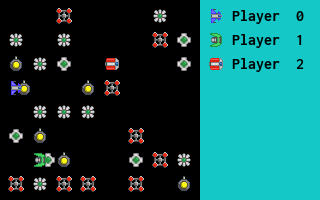

In [4]:
# Render as an RGB image to see things more clearly
Image.fromarray(env.render(mode='rgb_array'))

In [5]:
# Observations are returned after env.reset() or env.step() calls
print(observation)

{'ground': <env.env.Grid object at 0x7fc87d3d4080>, 'air': <env.env.Grid object at 0x7fc85c51d710>}


In [6]:
# We can inspect what's on the ground
observation['ground'].grid

array([[None, None, #, None, None, None, P, None],
       [P, None, P, None, None, None, #, Z],
       [@, P, Z, None, None, None, None, Z],
       [@, None, None, @, #, None, None, None],
       [None, P, P, P, None, None, None, None],
       [Z, @, None, None, None, #, None, None],
       [None, Z, @, None, None, Z, #, P],
       [#, P, #, #, None, #, None, @]], dtype=object)

In [7]:
# We can inspect what's on the air
observation['air'].grid

array([[None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, None, D2, None, None, None],
       [D0, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, D1, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None]], dtype=object)

{0: OrderedDict([('target_dir', 1), ('station_dir', 4), ('charge_level', 3)]),
 1: OrderedDict([('target_dir', 3), ('station_dir', 3), ('charge_level', 3)]),
 2: OrderedDict([('target_dir', 6), ('station_dir', 8), ('charge_level', 3)])}


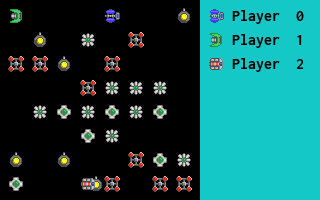

In [12]:
from env.wrappers import CompassQTable, CompassChargeQTable, LidarCompassQTable, LidarCompassChargeQTable

# Create the environment
env = DeliveryDrones()

# Use an observation wrappers
# env = CompassQTable(env)
env = CompassChargeQTable(env)
# env = LidarCompassQTable(env)
# env = LidarCompassChargeQTable(env)

# Reset the environment and print inital observation
observation = env.reset()
print(pretty(observation))

# Render as an RGB image
Image.fromarray(env.render(mode='rgb_array'))

In [13]:
# Print the state in a nicer way using `env.format_state`
{drone: env.format_state(observation) for drone, observation in observation.items()}

{0: 'target: ↙, station: →, charge: 3',
 1: 'target: ↘, station: ↘, charge: 3',
 2: 'target: ↑, station: X, charge: 3'}

In [0]:
from env.env import Action

Action??

Rewards: {0: 0, 2: -0.1}


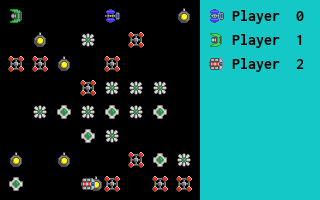

In [16]:
observation, reward, done, info = env.step({0: Action.STAY})

print('Rewards: {}'.format(reward))
Image.fromarray(env.render(mode='rgb_array'))

In [17]:
{drone: env.format_state(observation) for drone, observation in observation.items()}

{0: 'target: ↙, station: →, charge: 3',
 1: 'target: ↘, station: ↘, charge: 3',
 2: 'target: ↑, station: X, charge: 3'}

In [18]:
{drone: env.format_state(observation) for drone, observation in observation.items()}

{0: 'target: ↙, station: →, charge: 3',
 1: 'target: ↘, station: ↘, charge: 3',
 2: 'target: ↑, station: X, charge: 3'}

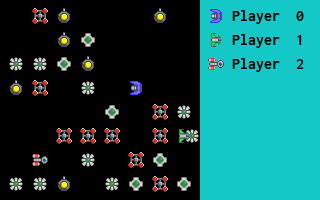

In [19]:
from env.wrappers import WindowedGridView

env = WindowedGridView(DeliveryDrones(), radius=3)
states = env.reset()
Image.fromarray(env.render(mode='rgb_array'))

In [20]:
{drone: env.format_state(state) for drone, state in states.items()}

{0: 'Numpy array (7, 7, 6)',
 1: 'Numpy array (7, 7, 6)',
 2: 'Numpy array (7, 7, 6)'}

In [21]:
states[0][:, :, 5] # Obstacles from the perspective of drone 0

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1.]])

In [22]:
from agents.random import RandomAgent

# Create and setup the environment
env = WindowedGridView(DeliveryDrones(), radius=3)
states = env.reset()

# Create random agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents

{0: <agents.random.RandomAgent at 0x7fc85b9a3748>,
 1: <agents.random.RandomAgent at 0x7fc85b9a3da0>,
 2: <agents.random.RandomAgent at 0x7fc85b9a3eb8>}

In [23]:
from helpers.rl_helpers import test_agents

# Run agents for 1000 steps
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)

# Print rewards
for drone_index, rewards in rewards_log.items():
    print('Drone {} rewards: {} ..'.format(drone_index, rewards[:10]))


Drone 0 rewards: [-0.1, -1, 0, -1, 0, 0, 0, 0, 0, 0] ..
Drone 1 rewards: [-1, -1, 0, 0, 0, 0, 1, 0, 0, 0] ..
Drone 2 rewards: [0, -0.1, 0, 0, 0, 0, 0, 0, 0, 0] ..


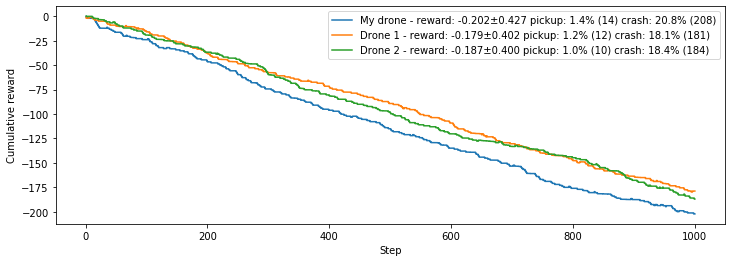

In [25]:
from helpers.rl_helpers import plot_cumulative_rewards

plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [1], 'crash': [-1]}, # Optional, default: pickup/crash ±1
    drones_labels={0: 'My drone'}, # Optional, default: drone index
)

Train a first agent
---

To train your agents, you will use the `MultiAgentTrainer()`.

You will train a first DQN agent, that you will learn more about soon.

In [26]:
from agents.dqn import DQNAgent, DenseQNetworkFactory
from helpers.rl_helpers import MultiAgentTrainer, plot_rolling_rewards

# Create and setup the environment
env = WindowedGridView(DeliveryDrones(), radius=3)
env.env_params.update({'n_drones': 3, 'skyscrapers_factor': 0, 'charge_reward': 0, 'discharge': 0})
states = env.reset()

# Create random agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}

# Use a DQNAgent for agent 0 - we will see how this works next
agents[0] = DQNAgent(
    env, DenseQNetworkFactory(env, hidden_layers=[32, 32]),
    gamma=0.95, epsilon_start=1.0, epsilon_decay=0.999, epsilon_end=0.01,
    memory_size=10000, batch_size=64, target_update_interval=5
)

agents

{0: <agents.dqn.DQNAgent at 0x7fc80e029860>,
 1: <agents.random.RandomAgent at 0x7fc80e029908>,
 2: <agents.random.RandomAgent at 0x7fc80e029128>}

In [0]:
RandomAgent??

In [28]:
# Create trainer
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)

# Train with different grids
trainer.train(1000)

# Print rewards
for drone_index, rewards in trainer.rewards_log.items():
    print('Drone {} rewards: {} ..'.format(drone_index, rewards[:10]))


Drone 0 rewards: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] ..
Drone 1 rewards: [0, -1, -1, 0, -1, 0, 0, 0, 0, 0] ..
Drone 2 rewards: [0, 0, -1, 0, -1, 0, 0, 0, 0, 0] ..


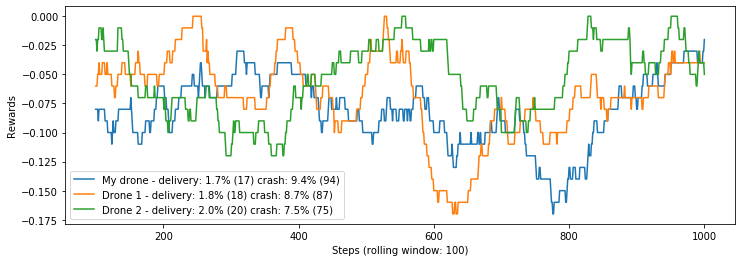

In [31]:
plot_rolling_rewards(
    trainer.rewards_log,
    drones_labels={0: 'My drone'}, # Optional: specify drone names
)

Test agents
---

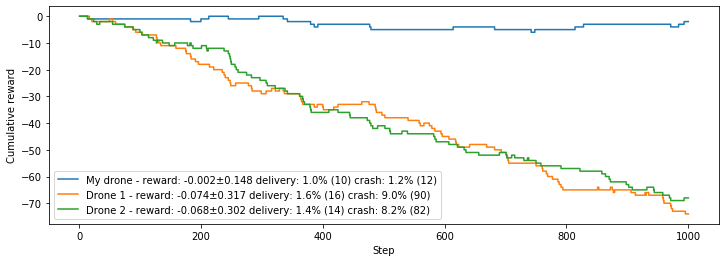

In [32]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=1)
plot_cumulative_rewards(rewards_log, drones_labels={0: 'My drone'})

In [33]:
from helpers.rl_helpers import render_video, ColabVideo

path = os.path.join('output', 'videos', 'intro-run.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=None)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3760128/45929032 bytes (8.2%)7954432/45929032 bytes (17.3%)11755520/45929032 bytes (25.6%)15736832/45929032 bytes (34.3%)19939328/45929032 bytes (43.4%)24158208/45929032 bytes (52.6%)28385280/45929032 bytes (61.8%)32645120/45929032 bytes (71.1%)36904960/45929032 bytes (80.4%)41082880/45929032 bytes (89.4%)45056000/45929032 bytes (98.1%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root


[MoviePy] >>>> Building video output/videos/intro-run.mp4
[MoviePy] Writing video output/videos/intro-run.mp4


100%|█████████▉| 2880/2881 [00:06<00:00, 457.56it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: output/videos/intro-run.mp4 



In [34]:
# Display the video in the notebook
ColabVideo(path)

In [0]:
path = os.path.join('output', 'agents', 'first-agent.pt')
agents[0].save(path)